# Importing libraries/defining settings/reading file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 81)

In [2]:
input_file = "../data/Kickstarter_2019.pkl"
df_kickstarter = pd.read_pickle(input_file)

# Overview of table

**Show head**

In [3]:
df_kickstarter.head()

,slug,name,blurb,category_lvl1,category_lvl2,country,created_at,deadline,launched_at,usd_goal,usd_pledged,state,state_changed_at,backers_count,user_id,project_url,extract_date,extract_month,created_month,state_defined
1,reset-0,reset,Reset your life one step at a time.,film & video,drama,US,2019-01-06 17:41:43,2019-02-10 00:58:38,2019-01-11 00:58:38,4000.00000,407.000000,live,2019-01-11 00:58:38,15,1928989247,https://www.kickstarter.com/projects/192898924...,2019-01-17,2019-01-01,2019-01-01,failed/canceled
2,the-verbalist,The Verbalist,A movie featuring dialogue from backers.,film & video,comedy,US,2019-01-07 03:57:47,2019-03-07 05:21:00,2019-01-13 23:11:43,2500.00000,1.000000,live,2019-01-13 23:11:43,1,2111941470,https://www.kickstarter.com/projects/verbalist...,2019-01-17,2019-01-01,2019-01-01,failed/canceled
3,me-ayudas-a-grabar-mi-disco,¿Me ayudas a grabar mi disco ?,Hola !! \nMI nombre es Juan Pablo y soy cantan...,music,pop,MX,2019-01-14 14:24:12,2019-02-14 06:00:00,2019-01-14 19:59:11,11494.43240,115.874328,live,2019-01-14 19:59:11,5,920503674,https://www.kickstarter.com/projects/920503674...,2019-01-17,2019-01-01,2019-01-01,failed/canceled
4,marys-vine,Mary's Vine,A Unique Wine Experience,food,drinks,US,2019-01-09 22:13:42,2019-02-14 19:15:30,2019-01-15 19:15:30,50000.00000,496.000000,live,2019-01-15 19:15:31,9,597988581,https://www.kickstarter.com/projects/marysvine...,2019-01-17,2019-01-01,2019-01-01,failed/canceled
5,self-care-pins-20,Self Care Pins 2.0,Cute enamel pins. Because fluffy animals give ...,fashion,accessories,GB,2019-01-05 16:40:12,2019-02-10 20:33:00,2019-01-11 20:33:00,319.58602,253.112128,live,2019-01-11 20:33:00,14,483736337,https://www.kickstarter.com/projects/483736337...,2019-01-17,2019-01-01,2019-01-01,failed/canceled


**Find the total number of rows and columns with the shape attribute**

In [4]:
# first value shows #rows, second value #columns
df_kickstarter.shape

(30868, 20)

**Show data types**

In [5]:
df_kickstarter.dtypes

slug                        object
name                        object
blurb                       object
category_lvl1               object
category_lvl2               object
country                     object
created_at          datetime64[ns]
deadline            datetime64[ns]
launched_at         datetime64[ns]
usd_goal                   float64
usd_pledged                float64
state                       object
state_changed_at    datetime64[ns]
backers_count                int64
user_id                     object
project_url                 object
extract_date        datetime64[ns]
extract_month       datetime64[ns]
created_month       datetime64[ns]
state_defined               object
dtype: object

**Show # of missing values per column**

In [6]:
df_kickstarter.isna().sum()

slug                   0
name                   0
blurb                  0
category_lvl1          0
category_lvl2       5515
country                0
created_at             0
deadline               0
launched_at            0
usd_goal               0
usd_pledged            0
state                  0
state_changed_at       0
backers_count          0
user_id               64
project_url            0
extract_date           0
extract_month          0
created_month          0
state_defined          0
dtype: int64

In [7]:
df_kickstarter.isna().describe()

,slug,name,blurb,category_lvl1,category_lvl2,country,created_at,deadline,launched_at,usd_goal,usd_pledged,state,state_changed_at,backers_count,user_id,project_url,extract_date,extract_month,created_month,state_defined
count,30868,30868,30868,30868,30868,30868,30868,30868,30868,30868,30868,30868,30868,30868,30868,30868,30868,30868,30868,30868
unique,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,30868,30868,30868,30868,25353,30868,30868,30868,30868,30868,30868,30868,30868,30868,30804,30868,30868,30868,30868,30868


**Show only columns with missing values**

In [8]:
null_columns = df_kickstarter.isna().sum()
null_columns[null_columns.gt(0)]

category_lvl2    5515
user_id            64
dtype: int64

**Calculating percentage of missing values**

In [9]:
null_prop = null_columns[null_columns.gt(0)] / len(df_kickstarter)
null_columns[null_columns.gt(0)] / len(df_kickstarter)

category_lvl2    0.178664
user_id          0.002073
dtype: float64

**Show statistics for all columns**

In [10]:
df_kickstarter.describe(include='all')

,slug,name,blurb,category_lvl1,category_lvl2,country,created_at,deadline,launched_at,usd_goal,usd_pledged,state,state_changed_at,backers_count,user_id,project_url,extract_date,extract_month,created_month,state_defined
count,30868,30868,30868,30868,25353,30868,30868,30868,30868,3.086800e+04,3.086800e+04,30868,30868,30868.000000,30804,30868,30868,30868,30868,30868
unique,30000,29967,29773,15,144,22,29984,27550,29945,NaN,NaN,4,28648,NaN,26575,30868,12,12,12,2
top,otaku-couples-and-ships-enamel-pins,Imperial studios,ALL-NEW SEXY BADGIRL characters from comic boo...,games,tabletop games,US,2019-01-04 13:09:38,2019-11-01 03:59:00,2019-02-21 20:00:01,NaN,NaN,successful,2019-11-01 03:59:00,NaN,1328919671,https://www.kickstarter.com/projects/redgenieg...,2019-12-12 00:00:00,2019-12-01 00:00:00,2019-01-01 00:00:00,successful
freq,3,3,17,4935,2856,17955,3,27,4,NaN,NaN,15544,22,NaN,15,1,21875,21875,4053,15824
first,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 00:50:12,2019-01-13 19:00:00,2019-01-01 06:00:05,NaN,NaN,NaN,2019-01-01 06:00:05,NaN,NaN,NaN,2019-01-17 00:00:00,2019-01-01 00:00:00,2019-01-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-04 03:04:26,2019-12-11 23:59:00,2019-12-06 21:50:42,NaN,NaN,NaN,2019-12-11 23:59:00,NaN,NaN,NaN,2019-12-12 00:00:00,2019-12-01 00:00:00,2019-12-01 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.521906e+04,1.625971e+04,NaN,NaN,182.528800,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.152081e+05,1.454413e+05,NaN,NaN,1103.380172,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.114279e-01,0.000000e+00,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+03,1.120000e+02,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN


----

# Distribution categorical columns

## Analysis of Categories (lvl1/lvl2)

**Show absolute/relativ value counts**

*lvl1 categories*

In [11]:
# number of lvl1 categories
df_kickstarter.category_lvl1.nunique()

15

In [12]:
#summary statistics of the numerical values of lvl1
df_kickstarter.category_lvl1.describe()

count     30868
unique       15
top       games
freq       4935
Name: category_lvl1, dtype: object

In [13]:
#lvl1 - absolute value counts
df_kickstarter.category_lvl1.value_counts()

games           4935
art             3779
publishing      2957
film & video    2905
design          2901
fashion         2723
technology      2561
music           2545
comics          1789
food            1521
crafts           807
theater          513
photography      484
journalism       303
dance            145
Name: category_lvl1, dtype: int64

In [14]:
#lvl1 - relative value counts
df_kickstarter.category_lvl1.value_counts(normalize=True)

games           0.159874
art             0.122425
publishing      0.095795
film & video    0.094110
design          0.093981
fashion         0.088214
technology      0.082966
music           0.082448
comics          0.057956
food            0.049274
crafts          0.026144
theater         0.016619
photography     0.015680
journalism      0.009816
dance           0.004697
Name: category_lvl1, dtype: float64

*lvl2 categories*

In [15]:
# number of lvl2 categories
df_kickstarter.category_lvl2.nunique()

144

In [16]:
#summary statistics of the numerical values of lvl2
df_kickstarter.category_lvl2.describe()

count              25353
unique               144
top       tabletop games
freq                2856
Name: category_lvl2, dtype: object

In [17]:
#lvl2 - absolute value counts
df_kickstarter.category_lvl2.value_counts()

tabletop games        2856
product design        2310
accessories           1095
video games            924
illustration           921
comic books            855
apparel                791
children's books       633
apps                   632
playing cards          585
documentary            555
fiction                467
graphic novels         441
nonfiction             432
gadgets                415
shorts                 413
comedy                 328
digital art            317
web                    285
drama                  274
drinks                 260
art books              237
mixed media            236
restaurants            230
country & folk         223
jewelry                220
software               208
photobooks             208
anthologies            204
rock                   204
hardware               192
animation              189
painting               175
webseries              166
pop                    160
graphic design         154
indie rock             152
f

In [18]:
#lvl2 - relative value counts
df_kickstarter.category_lvl2.value_counts(normalize=True)

tabletop games        0.112649
product design        0.091113
accessories           0.043190
video games           0.036445
illustration          0.036327
comic books           0.033724
apparel               0.031199
children's books      0.024967
apps                  0.024928
playing cards         0.023074
documentary           0.021891
fiction               0.018420
graphic novels        0.017394
nonfiction            0.017039
gadgets               0.016369
shorts                0.016290
comedy                0.012937
digital art           0.012503
web                   0.011241
drama                 0.010807
drinks                0.010255
art books             0.009348
mixed media           0.009309
restaurants           0.009072
country & folk        0.008796
jewelry               0.008677
software              0.008204
photobooks            0.008204
anthologies           0.008046
rock                  0.008046
hardware              0.007573
animation             0.007455
painting

In [19]:
df_kickstarter.groupby(['category_lvl1']).count()

,slug,name,blurb,category_lvl2,country,created_at,deadline,launched_at,usd_goal,usd_pledged,state,state_changed_at,backers_count,user_id,project_url,extract_date,extract_month,created_month,state_defined
category_lvl1,,,,,,,,,,,,,,,,,,,
art,3779,3779,3779,2243,3779,3779,3779,3779,3779,3779,3779,3779,3779,3775,3779,3779,3779,3779,3779
comics,1789,1789,1789,1550,1789,1789,1789,1789,1789,1789,1789,1789,1789,1781,1789,1789,1789,1789,1789
crafts,807,807,807,445,807,807,807,807,807,807,807,807,807,805,807,807,807,807,807
dance,145,145,145,116,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145
design,2901,2901,2901,2570,2901,2901,2901,2901,2901,2901,2901,2901,2901,2897,2901,2901,2901,2901,2901
fashion,2723,2723,2723,2474,2723,2723,2723,2723,2723,2723,2723,2723,2723,2718,2723,2723,2723,2723,2723
film & video,2905,2905,2905,2589,2905,2905,2905,2905,2905,2905,2905,2905,2905,2897,2905,2905,2905,2905,2905
food,1521,1521,1521,1163,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521
games,4935,4935,4935,4701,4935,4935,4935,4935,4935,4935,4935,4935,4935,4921,4935,4935,4935,4935,4935


**LVL2 Categories per LVL1 Category**

In [74]:
#show the lvl2 categories for each lvl1 category
df_kickstarter[['category_lvl1','category_lvl2']].groupby(['category_lvl1','category_lvl2']).count()

Empty DataFrame
Columns: []
Index: [(art, ceramics), (art, conceptual art), (art, digital art), (art, illustration), (art, installations), (art, mixed media), (art, painting), (art, performance art), (art, public art), (art, sculpture), (art, social practice), (art, textiles), (art, video art), (comics, anthologies), (comics, comic books), (comics, events), (comics, graphic novels), (comics, webcomics), (crafts, candles), (crafts, crochet), (crafts, diy), (crafts, embroidery), (crafts, glass), (crafts, knitting), (crafts, pottery), (crafts, printing), (crafts, quilts), (crafts, stationery), (crafts, weaving), (crafts, woodworking), (dance, performances), (dance, residencies), (dance, spaces), (dance, workshops), (design, architecture), (design, civic design), (design, graphic design), (design, interactive design), (design, product design), (design, typography), (fashion, accessories), (fashion, apparel), (fashion, childrenswear), (fashion, couture), (fashion, footwear), (fashion, jewelry), (fashion, pet fashion), (fashion, ready-to-wear), (film & video, action), (film & video, animation), (film & video, comedy), (film & video, documentary), (film & video, drama), (film & video, experimental), (film & video, family), (film & video, fantasy), (film & video, festivals), (film & video, horror), (film & video, movie theaters), (film & video, music videos), (film & video, narrative film), (film & video, romance), (film & video, science fiction), (film & video, shorts), (film & video, television), (film & video, thrillers), (film & video, webseries), (food, bacon), (food, community gardens), (food, cookbooks), (food, drinks), (food, events), (food, farmer's markets), (food, farms), (food, food trucks), (food, restaurants), (food, small batch), (food, spaces), (food, vegan), (games, gaming hardware), (games, live games), (games, mobile games), (games, playing cards), (games, puzzles), (games, tabletop games), (games, video games), (journalism, audio), (journalism, photo), (journalism, print), (journalism, video), (journalism, web), (music, blues), (music, chiptune), (music, classical music), (music, comedy), (music, country & folk), (music, electronic music), (music, faith), (music, hip-hop), (music, indie rock), ...]

**Summary statistics category_lvl1**

In [21]:
df_kickstarter.groupby(['category_lvl1']).describe()

usd_goal                                                       \
                 count          mean           std         min          25%   
category_lvl1                                                                 
art             3779.0   6470.859872  5.014820e+04    1.000000   350.000000   
comics          1789.0   5515.936350  1.668468e+04    0.511428   962.620256   
crafts           807.0   9338.331677  3.575947e+04   10.195294   671.095314   
dance            145.0   8302.367118  3.247555e+04  300.000000  2000.000000   
design          2901.0  23773.197966  1.344705e+05   10.000000  2284.810800   
fashion         2723.0  10945.778175  5.256140e+04    0.764666   522.830302   
film & video    2905.0  61366.771798  1.335447e+06    0.926479  1965.000000   
food            1521.0  36701.622500  1.628017e+05    1.000000  5000.000000   
games           4935.0  20361.441259  2.335686e+05    1.000000  1124.662955   
journalism       303.0  14132.170361  3.467882e+04   25.465013  1500.000000   
music           2545.0  11979.524725  7.345445e+04    0.643600  1811.403600   
photography      484.0   8841.267413  1.728986e+04    1.272862  1200.000000   
publishing      2957.0   8890.036541  3.309061e+04    1.000000  1250.000000   
technology      2561.0  89956.955017  1.995320e+06    0.754790  5000.000000   
theater          513.0  12349.309194  3.859680e+04   70.819323  1500.000000   

                                                        usd_pledged  \
                        50%           75%           max       count   
category_lvl1                                                         
art              719.497422   3300.000000  2.187298e+06      3779.0   
comics          2500.000000   5200.000000  5.000000e+05      1789.0   
crafts          2202.070820   6153.043123  8.078580e+05       807.0   
dance           4000.000000   6561.309550  3.900000e+05       145.0   
design          7647.744600  19199.140500  5.000000e+06      2901.0   
fashion         2206.382040  10000.000000  1.707975e+06      2723.0   
film & video    5000.000000  15000.000000  7.000000e+07      2905.0   
food           10000.000000  25232.251440  5.000000e+06      1521.0   
games           5000.000000  12963.976995  1.250000e+07      4935.0   
journalism      5000.000000  12697.326150  3.850000e+05       303.0   
music           4123.782400  10000.000000  3.100000e+06      2545.0   
photography     3777.314340  10000.000000  2.240000e+05       484.0   
publishing      3500.459250   8000.000000  1.256915e+06      2957.0   
technology     15000.000000  37543.174500  1.000000e+08      2561.0   
theater         3200.000000   7903.795020  4.076403e+05       513.0   

                                                                          \
                       mean            std  min         25%          50%   
category_lvl1                                                              
art             3522.720239   15151.696198  0.0  149.828553   667.000000   
comics          7734.920379   26020.298132  0.0  633.000000  2085.000000   
crafts          2125.193954    8631.593802  0.0   14.483396   202.000000   
dance           3731.309569    4276.834141  0.0  431.627201  2709.698128   
design         44830.845812  285947.192786  0.0  447.000000  3665.000000   
fashion         6095.035036   63208.236334  0.0   60.407139   511.000000   
film & video   10416.652037  212434.387829  0.0   27.078092   762.000000   
food            7096.398612   45809.891972  0.0   36.000000   404.000000   
games          35230.139897  179551.823429  0.0  506.000000  3055.500000   
journalism      4233.321534   10848.821907  0.0    3.000000   137.689183   
music           5427.489706   13501.094262  0.0  115.874328  1741.000000   
photography     7462.661715   35408.400453  0.0   85.768368   829.199533   
publishing      5831.254297   22952.259003  0.0   51.000000   863.000000   
technology     28188.769828  197434.221103  0.0   24.159270   490.939135   
theater         5439

In [22]:
df_kickstarter.groupby(['category_lvl1']).describe().transpose()

category_lvl1                 art         comics         crafts  \
usd_goal      count  3.779000e+03    1789.000000     807.000000   
              mean   6.470860e+03    5515.936350    9338.331677   
              std    5.014820e+04   16684.679297   35759.470536   
              min    1.000000e+00       0.511428      10.195294   
              25%    3.500000e+02     962.620256     671.095314   
              50%    7.194974e+02    2500.000000    2202.070820   
              75%    3.300000e+03    5200.000000    6153.043123   
              max    2.187298e+06  500000.000000  807858.000000   
usd_pledged   count  3.779000e+03    1789.000000     807.000000   
              mean   3.522720e+03    7734.920379    2125.193954   
              std    1.515170e+04   26020.298132    8631.593802   
              min    0.000000e+00       0.000000       0.000000   
              25%    1.498286e+02     633.000000      14.483396   
              50%    6.670000e+02    2085.000000     202.000000   
              75%    2.491079e+03    5425.570348    1061.995023   
              max    6.367590e+05  631376.291887  161673.000000   
backers_count count  3.779000e+03    1789.000000     807.000000   
              mean   5.969939e+01     163.875908      30.494424   
              std    1.675489e+02     357.424509      85.306016   
              min    0.000000e+00       0.000000       0.000000   
              25%    6.000000e+00      22.000000       2.000000   
              50%    2.100000e+01      64.000000       6.000000   
              75%    5.800000e+01     159.000000      22.000000   
              max    5.304000e+03    7199.000000     866.000000   

category_lvl1                dance        design       fashion  film & video  \
usd_goal      count     145.000000  2.901000e+03  2.723000e+03  2.905000e+03   
              mean     8302.367118  2.377320e+04  1.094578e+04  6.136677e+04   
              std     32475.553057  1.344705e+05  5.256140e+04  1.335447e+06   
              min       300.000000  1.000000e+01  7.646657e-01  9.264790e-01   
              25%      2000.000000  2.284811e+03  5.228303e+02  1.965000e+03   
              50%      4000.000000  7.647745e+03  2.206382e+03  5.000000e+03   
              75%      6561.309550  1.919914e+04  1.000000e+04  1.500000e+04   
              max    390000.000000  5.000000e+06  1.707975e+06  7.000000e+07   
usd_pledged   count     145.000000  2.901000e+03  2.723000e+03  2.905000e+03   
              mean     3731.309569  4.483085e+04  6.095035e+03  1.041665e+04   
              std      4276.834141  2.859472e+05  6.320824e+04  2.124344e+05   
              min         0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
              25%       431.627201  4.470000e+02  6.040714e+01  2.707809e+01   
              50%      2709.698128  3.665000e+03  5.110000e+02  7.620000e+02   
              75%      5395.000000  1.989205e+04  2.591015e+03  4.941984e+03   
              max     25565.000000  1.214344e+07  3.127300e+06  1.138545e+07   
backers_count count     145.000000  2.901000e+03  2.723000e+03  2.905000e+03   
              mean       47.062069  3.716794e+02  6.671539e+01  1.024540e+02   
              std        50.568603  1.455032e+03  3.868781e+02  1.760744e+03   
              min         0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
              25%         9.000000  9.000000e+00  3.000000e+00  2.000000e+00   
              50%        34.000000  4.300000e+01  1.400000e+01  1.300000e+01   
              75%        65.000000  1.820000e+02  5.100000e+01  5.100000e+01   
              max       277.000000  2.794200e+04  1.740200e+04  8.888700e+04   

category_lvl1                food         games     journalism         music  \
usd_goal      count  1.521000e+03  4.935000e+03     303.000000  2.545000e+03   
              mean   3.670162e+04  2.036144e+04   14132.170361  1.197952e+04   
              std    1.628017e+05  2.335686e+05   34678.820269  7.345445e+04   
   

**Summary statistics grouped by category_lvl1 + lvl2**

In [23]:
df_kickstarter.groupby(['category_lvl1', 'category_lvl2']).describe()

usd_goal                              \
                                    count          mean           std   
category_lvl1 category_lvl2                                             
art           ceramics               47.0  6.549935e+03  9.746333e+03   
              conceptual art         74.0  2.234268e+04  1.060900e+05   
              digital art           317.0  3.246294e+03  1.568416e+04   
              illustration          921.0  2.316612e+03  4.994518e+03   
              installations          62.0  4.648170e+04  2.779883e+05   
              mixed media           236.0  5.943686e+03  1.496538e+04   
              painting              175.0  4.511176e+03  8.649894e+03   
              performance art       101.0  1.794086e+04  1.004491e+05   
              public art            107.0  1.702530e+04  4.750168e+04   
              sculpture             104.0  1.575657e+04  4.545696e+04   
              social practice        12.0  3.144697e+04  8.734226e+04   
              textiles               48.0  7.487237e+03  2.524324e+04   
              video art              39.0  7.895990e+03  1.243053e+04   
comics        anthologies           116.0  7.579539e+03  9.596079e+03   
              comic books           855.0  3.181438e+03  4.864481e+03   
              events                 14.0  1.373988e+04  2.573755e+04   
              graphic novels        441.0  8.649380e+03  2.573611e+04   
              webcomics             124.0  8.782879e+03  3.202669e+04   
crafts        candles                56.0  6.625971e+03  1.696414e+04   
              crochet                14.0  3.076743e+03  7.909866e+03   
              diy                   116.0  1.992968e+04  8.658941e+04   
              embroidery             17.0  4.271595e+03  7.205046e+03   
              glass                  10.0  6.879884e+03  8.160464e+03   
              knitting               16.0  8.672008e+03  9.875676e+03   
              pottery                17.0  5.929977e+03  7.839389e+03   
              printing               36.0  7.756039e+03  1.690454e+04   
              quilts                  3.0  2.492900e+04  3.042528e+04   
              stationery             39.0  1.286867e+04  2.074305e+04   
              weaving                 7.0  3.261661e+03  2.996619e+03   
              woodworking           114.0  8.777211e+03  1.397976e+04   
dance         performances           87.0  9.267694e+03  4.168397e+04   
              residencies             4.0  1.962429e+03  1.858115e+03   
              spaces                 17.0  1.007441e+04  7.884033e+03   
              workshops               8.0  5.731577e+03  5.976086e+03   
design        architecture           45.0  2.554445e+05  6.409765e+05   
              civic design           18.0  8.110717e+04  1.744877e+05   
              graphic design        154.0  3.794173e+04  4.027633e+05   
              interactive design     38.0  1.290800e+04  1.810125e+04   
              product design       2310.0  1.880189e+04  3.984249e+04   
              typography              5.0  8.207537e+03  5.498311e+03   
fashion       accessories          1095.0  4.981548e+03  3.551994e+04   
              apparel               791.0  1.478882e+04  6.611836e+04   
              childrenswear          63.0  9.332753e+03  1.065289e+04   
              couture                27.0  3.037580e+04  6.548078e+04   
              footwear              150.0  2.344240e+04  8.269607e+04   
              jewelry               220.0  6.131170e+03  1.366012e+04   
              pet fashion            20.0  6.594023e+04  2.213887e+05   
              ready-to-wear         108.0  1.326896e+04  3.554993e+04   
film & video  action                 71.0  4.469181e+04  1.440104e+05   
              animation             189.0  3.010566e+04  1.052425e+05   
              comedy                207.0  8.322411e+03  1.415609e+04   
              documentary           555.0  2.970717e+04  1.068941e+05   
              dram

----

## Analysis of Country

**Show absolute/relativ value counts**

In [24]:
# number of countries
df_kickstarter.country.nunique()

22

In [25]:
#summary statistics of the numerical values of country
df_kickstarter.country.describe()

count     30868
unique       22
top          US
freq      17955
Name: country, dtype: object

In [26]:
#country - absolute value counts
df_kickstarter.country.value_counts()

US    17955
GB     4246
CA     1697
AU      865
DE      862
MX      845
FR      697
IT      652
ES      634
HK      435
NL      295
SE      287
SG      268
JP      180
DK      172
NZ      160
CH      159
BE      140
IE      115
AT      106
NO       79
LU       19
Name: country, dtype: int64

In [27]:
#country - relative value counts
df_kickstarter.country.value_counts(normalize=True)

US    0.581670
GB    0.137553
CA    0.054976
AU    0.028023
DE    0.027925
MX    0.027375
FR    0.022580
IT    0.021122
ES    0.020539
HK    0.014092
NL    0.009557
SE    0.009298
SG    0.008682
JP    0.005831
DK    0.005572
NZ    0.005183
CH    0.005151
BE    0.004535
IE    0.003726
AT    0.003434
NO    0.002559
LU    0.000616
Name: country, dtype: float64

**Summary statistics grouped by country**

In [28]:
df_kickstarter.groupby(['country']).describe()

usd_goal                                                        \
           count          mean            std         min          25%   
country                                                                  
AT         106.0  54140.138900  270893.686377  240.558883  3448.891176   
AU         865.0  16215.614728   93808.914381    6.792768   700.280110   
BE         140.0  38392.596963  194730.249413  335.874033  2843.154044   
CA        1697.0  15696.803176  143841.404559    0.754790   715.758129   
CH         159.0  94046.894333  785873.295232  200.579272  4703.358750   
DE         862.0  24247.598120   87502.487419   55.194948  1671.648694   
DK         172.0  24802.335461  108668.771208   15.005424  2211.688275   
ES         634.0  16232.440306   35285.665742   20.133890  1350.962925   
FR         697.0  20052.581532   69673.786684    1.108704  1116.192270   
GB        4246.0  14133.200980   95022.403817    1.228667   656.930950   
HK         435.0  14270.029216   34342.006409   12.757136  1278.241200   
IE         115.0  11008.551912   19249.468600  112.220851   875.429975   
IT         652.0  23237.153024  109130.365811    1.121450  1217.525078   
JP         180.0  18635.376721   70692.330662    0.926479   935.292250   
LU          19.0  19869.587591   27452.832833  245.388645  1375.030661   
MX         845.0  10586.626679   83148.986789    0.511428  1039.978800   
NL         295.0  15957.521360   39478.912799    1.128150  1136.742120   
NO          79.0  17938.815035   56381.067043  231.869980  2592.654026   
NZ         160.0  19721.996023  101414.329377    0.643600   637.164443   
SE         287.0  17776.540043   95252.993866   53.750150  1571.426250   
SG         268.0  12731.051629   45630.428454   36.509995   728.584205   
US       17955.0  30587.025842  930996.418255    1.000000  1100.000000   

                                                  usd_pledged                \
                  50%           75%           max       count          mean   
country                                                                       
AT       11212.226150  22446.462450  2.753874e+06       106.0  18633.243795   
AU        3033.880335  10075.830750  2.196847e+06       865.0   8605.100085   
BE        8142.712573  16836.294150  2.187298e+06       140.0  10673.701032   
CA        3023.600720   9621.549824  5.402951e+06      1697.0  11419.025177   
CH       13269.246621  38328.435200  9.915195e+06       159.0  17892.286375   
DE        5687.906925  16920.550687  1.707975e+06       862.0  11630.004353   
DK        5472.808350  13486.619635  1.206312e+06       172.0  13478.127744   
ES        5505.099325  16803.003150  4.554600e+05       634.0  17026.000514   
FR        5084.510220  15072.233112  1.129644e+06       697.0  13719.487143   
GB        2611.271190   8241.544819  4.421685e+06      4246.0  10506.089999   
HK        5102.424800  12741.234500  3.827258e+05       435.0  27681.629122   
IE        3408.633840  14505.524833  1.700532e+05       115.0   7646.456537   
IT        5549.066425  16835.381513  2.227033e+06       652.0  11802.408662   
JP        3857.222000   9280.807500  8.078580e+05       180.0  18106.161855   
LU       11010.790600  26130.850505  1.116326e+05        19.0  12968.917205   
MX        2384.261075   5223.255000  2.308731e+06       845.0   1271.413395   
NL        5578.252850  16733.648100  4.940430e+05       295.0  11055.304268   
NO        6469.392050  13780.590000  4.805357e+05        79.0  21298.228816   
NZ        2964.620542   8503.967693  9.057599e+05       160.0   9622.227476   
SE        5312.102000  15144.928880  1.590407e+06       287.0  14549.606729   
SG        2667.014092   9982.611133  6.586672e+05       268.0   6224.930479   
US        5000.000000  12027.500000  1.000000e+08     17955.0  19712.418492   

                                                                         \
                   std       min         25%          50%           75%   
country                        

## Analysis of state_defined

**Show absolute/relativ value counts**

In [29]:
# number of state_defineds
df_kickstarter.state_defined.nunique()

2

In [30]:
#summary statistics of the numerical values of state_defined
df_kickstarter.state_defined.describe()

count          30868
unique             2
top       successful
freq           15824
Name: state_defined, dtype: object

In [31]:
#state_defined - absolute value counts
df_kickstarter.state_defined.value_counts()

successful         15824
failed/canceled    15044
Name: state_defined, dtype: int64

In [32]:
#state_defined - relative value counts
df_kickstarter.state_defined.value_counts(normalize=True)

successful         0.512634
failed/canceled    0.487366
Name: state_defined, dtype: float64

**Summary statistics grouped by state_defined**

In [33]:
df_kickstarter.groupby(['state_defined']).describe()

usd_goal                                                     \
                   count          mean           std       min          25%   
state_defined                                                                 
failed/canceled  15044.0  43750.134528  1.023954e+06  1.569107  2000.000000   
successful       15824.0   7601.422103  2.069940e+04  0.511428   648.948261   

                                                        usd_pledged  \
                         50%           75%          max       count   
state_defined                                                         
failed/canceled  6102.689425  19799.668337  100000000.0     15044.0   
successful       2595.400670   8000.000000    1285000.0     15824.0   

                                                                     \
                         mean            std       min          25%   
state_defined                                                         
failed/canceled   1081.206431    4339.791763  0.000000     4.453784   
successful       30690.032751  202038.916601  0.913912  1595.151760   

                                                    backers_count              \
                         50%       75%          max         count        mean   
state_defined                                                                   
failed/canceled   109.000000    626.00    203977.03       15044.0   14.664983   
successful       4898.267706  14728.25  12143435.67       15824.0  342.118238   

                                                               
                         std  min   25%   50%    75%      max  
state_defined                                                  
failed/canceled    42.241520  0.0   2.0   4.0   13.0   2547.0  
successful       1523.482946  1.0  36.0  82.0  210.0  88887.0

---

## Analysis of user_id

**Show absolute/relativ value counts**

In [34]:
# number of user_id
df_kickstarter.user_id.nunique()

26575

In [35]:
#summary statistics of the numerical values of user_id
df_kickstarter.user_id.describe()

count          30804
unique         26575
top       1328919671
freq              15
Name: user_id, dtype: object

In [36]:
#user_id - absolute value counts
df_kickstarter.user_id.value_counts().head(20)

1328919671    15
356411186     15
671085809     14
1438234520    14
1484782587    12
1306925656    12
1627453715    12
1016374822    11
877464265     11
400294490     11
1421716661    11
706679545     10
1077465647    10
141004033     10
1222617343    10
355276126      9
117778923      9
1663480914     9
643047657      9
1372111648     9
Name: user_id, dtype: int64

In [37]:
#user_id - relative value counts
df_kickstarter.user_id.value_counts(normalize=True)

1328919671    0.000487
356411186     0.000487
671085809     0.000454
1438234520    0.000454
1484782587    0.000390
                ...   
396043463     0.000032
480103147     0.000032
1622507295    0.000032
1011090192    0.000032
1152903096    0.000032
Name: user_id, Length: 26575, dtype: float64

**Summary statistics grouped by user_id**

In [38]:
#df_kickstarter.groupby(['user_id']).describe() - not running due to performance

---

## Analysis of project_url 
## (this section is irrelevant in case a table with unique projects is analysed)

**Show absolute/relativ value counts**

In [39]:
# number of project_url
df_kickstarter.project_url.nunique()

30868

In [40]:
#summary statistics of the numerical values of project_url
df_kickstarter.project_url.describe()

count                                                 30868
unique                                                30868
top       https://www.kickstarter.com/projects/redgenieg...
freq                                                      1
Name: project_url, dtype: object

In [41]:
#project_url - absolute value counts
df_kickstarter.project_url.value_counts()

https://www.kickstarter.com/projects/redgeniegames/fools-haven-adventure-pack-a-darkly-comedic-rpg-se?ref=discovery_category_newest     1
https://www.kickstarter.com/projects/1768430844/brazilian-snacks-zily-bites?ref=discovery_category_newest                               1
https://www.kickstarter.com/projects/fruitea/pure-fruit-tea-bliss?ref=discovery_category_newest                                         1
https://www.kickstarter.com/projects/cutlassboardgames/spirits-of-carter-mansion?ref=discovery_category_newest                          1
https://www.kickstarter.com/projects/fromaggio/fromaggio-worlds-first-smart-automatic-home-cheese-0?ref=discovery_category_newest       1
                                                                                                                                       ..
https://www.kickstarter.com/projects/folkland/folkland-weekender?ref=discovery_category_newest                                          1
https://www.kickstarter.com/projec

In [42]:
#project_url - relative value counts
df_kickstarter.project_url.value_counts(normalize=True)

https://www.kickstarter.com/projects/redgeniegames/fools-haven-adventure-pack-a-darkly-comedic-rpg-se?ref=discovery_category_newest     0.000032
https://www.kickstarter.com/projects/1768430844/brazilian-snacks-zily-bites?ref=discovery_category_newest                               0.000032
https://www.kickstarter.com/projects/fruitea/pure-fruit-tea-bliss?ref=discovery_category_newest                                         0.000032
https://www.kickstarter.com/projects/cutlassboardgames/spirits-of-carter-mansion?ref=discovery_category_newest                          0.000032
https://www.kickstarter.com/projects/fromaggio/fromaggio-worlds-first-smart-automatic-home-cheese-0?ref=discovery_category_newest       0.000032
                                                                                                                                          ...   
https://www.kickstarter.com/projects/folkland/folkland-weekender?ref=discovery_category_newest                                    

**Summary statistics grouped by user_id**

In [43]:
#df_kickstarter.groupby(['project_url']).describe()  - not running due to performance

---

# Distribution numerical columns

**Overview over all numerical columns**

In [44]:
df_kickstarter.describe(include=[np.number])

,usd_goal,usd_pledged,backers_count
count,3.086800e+04,3.086800e+04,30868.000000
mean,2.521906e+04,1.625971e+04,182.528800
std,7.152081e+05,1.454413e+05,1103.380172
min,5.114279e-01,0.000000e+00,0.000000
25%,1.000000e+03,1.120000e+02,4.000000
50%,4.190982e+03,1.151000e+03,24.000000
75%,1.200000e+04,5.820250e+03,92.000000
max,1.000000e+08,1.214344e+07,88887.000000


## Analysis of usd_goal

In [45]:
#summary statistics of usd_goal
df_kickstarter.usd_goal.describe()

count    3.086800e+04
mean     2.521906e+04
std      7.152081e+05
min      5.114279e-01
25%      1.000000e+03
50%      4.190982e+03
75%      1.200000e+04
max      1.000000e+08
Name: usd_goal, dtype: float64

In [46]:
#total sum of usd_goal
df_kickstarter.usd_goal.sum()

778461927.1984205

## Analysis of usd_pledged

In [47]:
#summary statistics of usd_pledged
df_kickstarter.usd_pledged.describe()

count    3.086800e+04
mean     1.625971e+04
std      1.454413e+05
min      0.000000e+00
25%      1.120000e+02
50%      1.151000e+03
75%      5.820250e+03
max      1.214344e+07
Name: usd_pledged, dtype: float64

In [48]:
#total sum of usd_pledged
df_kickstarter.usd_pledged.sum()

501904747.7921537

In [49]:
# Relation usd_pledged vs. usd_goal
# over all projects

print(f"{(df_kickstarter.usd_pledged.sum() / df_kickstarter.usd_goal.sum()).round(decimals=2)*100}%")

64.0%


In [50]:
# Relation usd_pledged vs. usd_goal
# for failed projects

print(f"{(df_kickstarter[df_kickstarter['state_defined'] == 'failed/canceled'].usd_pledged.sum() / df_kickstarter[df_kickstarter['state_defined'] == 'failed/canceled'].usd_goal.sum()).round(decimals=2)*100}%")

2.0%


In [51]:
# Relation usd_pledged vs. usd_goal
# for successful projects

print(f"{((df_kickstarter[df_kickstarter['state_defined'] == 'successful'].usd_pledged.sum() / df_kickstarter[df_kickstarter['state_defined'] == 'successful'].usd_goal.sum()).round(decimals=2)-1)*100}%")

304.0%


## Analysis of backers_count

In [52]:
#summary statistics of backers_count
df_kickstarter.backers_count.describe()

count    30868.000000
mean       182.528800
std       1103.380172
min          0.000000
25%          4.000000
50%         24.000000
75%         92.000000
max      88887.000000
Name: backers_count, dtype: float64

In [53]:
#total number of backers over all projects
df_kickstarter.backers_count.sum()

5634299

----

# Split by country

In [54]:
df_kickstarter.groupby(['country', 'state_defined'])['state_defined'].count()

country  state_defined  
AT       failed/canceled      72
         successful           34
AU       failed/canceled     430
         successful          435
BE       failed/canceled      78
         successful           62
CA       failed/canceled     827
         successful          870
CH       failed/canceled      97
         successful           62
DE       failed/canceled     476
         successful          386
DK       failed/canceled      95
         successful           77
ES       failed/canceled     376
         successful          258
FR       failed/canceled     355
         successful          342
GB       failed/canceled    1833
         successful         2413
HK       failed/canceled     159
         successful          276
IE       failed/canceled      70
         successful           45
IT       failed/canceled     410
         successful          242
JP       failed/canceled      97
         successful           83
LU       failed/canceled      13
         successfu

In [55]:
#df_kickstarter[df_kickstarter.user_id.value_counts() > 30].groupby(['user_id', 'state_defined'])['state_defined'].count()

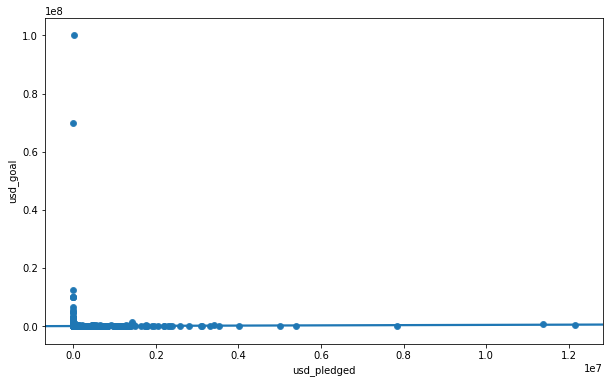

In [56]:
# show distribution of usd_pledged vs usd_goal

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(x=df_kickstarter['usd_pledged'], y=df_kickstarter['usd_goal']);

sns.regplot(x='usd_pledged',y='usd_goal',data=df_kickstarter, fit_reg=True) 

In [57]:
# median od usd_pledged per country
sorted_nb = df_kickstarter.groupby(['country'])['usd_pledged'].median().sort_values()
df_kickstarter.groupby(['country'])['usd_pledged'].median().sort_values()


country
MX      70.226788
IT     398.048126
ES     553.064401
AT     597.608204
IE     667.776638
AU     815.059679
CA     900.679410
DE     905.834783
SG     908.120646
FR     923.921798
NZ     994.560818
GB    1091.408302
DK    1101.472180
NL    1104.383965
JP    1113.103724
SE    1197.367055
US    1360.000000
LU    1501.147382
BE    1550.458132
NO    2341.018784
CH    2383.739546
HK    4097.344643
Name: usd_pledged, dtype: float64

(0, 50000)

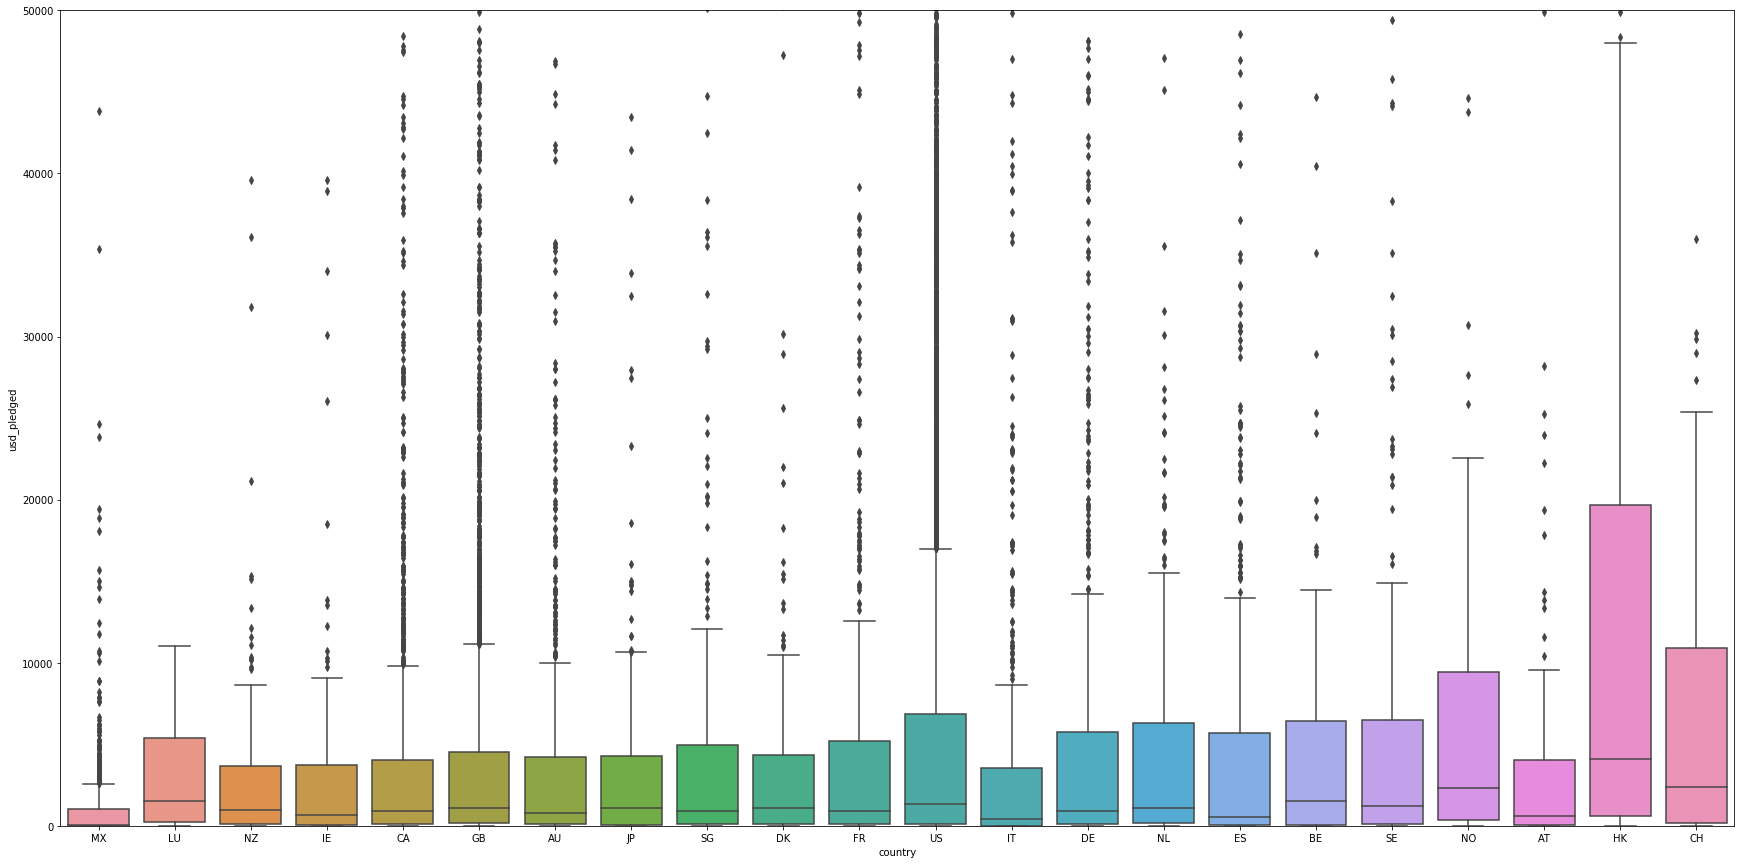

In [76]:
#Boxplot on successful projects per country
fig, ax = plt.subplots(figsize=(30,15))

sorted_nb = df_kickstarter[df_kickstarter['state_defined'] == 'successful'].groupby(['country'])['usd_pledged'].median().sort_values(ascending=True)
sns.boxplot(x=df_kickstarter['country'], y=df_kickstarter['usd_pledged'], order=list(sorted_nb.index))
ax.set_ylim([0,50000])

## Adding columns with percentages of totals (usd_pledged/usd_goal/backers_count)

In [59]:
#Adding columns with percentage of numercial values of total

df_kickstarter['% usd_goal total'] = (df_kickstarter['usd_goal']/
                                df_kickstarter['usd_goal'].sum())

df_kickstarter['% usd_pledged total'] = (df_kickstarter['usd_pledged']/
                                    df_kickstarter['usd_pledged'].sum())

df_kickstarter['% backers_count total'] = (df_kickstarter['backers_count']/
                                    df_kickstarter['backers_count'].sum())

In [60]:
#Adding columns with percentage of numercial values by country
df_kickstarter['% usd_goal by country'] = (df_kickstarter['usd_goal']/                                          
                                            df_kickstarter.groupby(['country'])['usd_goal']
                                            .transform('sum'))

df_kickstarter['% usd_pledged by country'] = (df_kickstarter['usd_pledged']/
                                              df_kickstarter.groupby(['country'])['usd_pledged']
                                              .transform('sum'))

df_kickstarter['% backers_count by country'] = (df_kickstarter['backers_count']/
                                                df_kickstarter.groupby(['country'])['backers_count']
                                                .transform('sum'))

In [78]:
# show percentages per country, split by state of projects
df_kickstarter.groupby(['country', 'state_defined'])['% usd_goal total', '% usd_pledged total', '% backers_count total', '% usd_goal by country', '% usd_pledged by country', '% backers_count by country'].sum()

% usd_goal total  % usd_pledged total  \
country state_defined                                            
AT      failed/canceled          0.006508             0.000190   
        successful               0.000864             0.003745   
AU      failed/canceled          0.015420             0.000781   
        successful               0.002598             0.014049   
BE      failed/canceled          0.006048             0.000160   
        successful               0.000857             0.002817   
CA      failed/canceled          0.028829             0.001756   
        successful               0.005389             0.036853   
CH      failed/canceled          0.017882             0.000660   
        successful               0.001327             0.005008   
DE      failed/canceled          0.022545             0.001204   
        successful               0.004304             0.018770   
DK      failed/canceled          0.004776             0.000204   
        successful               0.000705             0.004415   
ES      failed/canceled          0.010553             0.000767   
        successful               0.002667             0.020740   
FR      failed/canceled          0.013644             0.000753   
        successful               0.004311             0.018300   
GB      failed/canceled          0.060326             0.003405   
        successful               0.016761             0.085474   
HK      failed/canceled          0.005095             0.000756   
        successful               0.002879             0.023236   
IE      failed/canceled          0.001283             0.000206   
        successful               0.000343             0.001546   
IT      failed/canceled          0.017027             0.000583   
        successful               0.002435             0.014749   
JP      failed/canceled          0.003181             0.000195   
        successful               0.001128             0.006298   
LU      failed/canceled          0.000429             0.000069   
        successful               0.000056             0.000421   
MX      failed/canceled          0.010627             0.000272   
        successful               0.000864             0.001868   
NL      failed/canceled          0.004758             0.000253   
        successful               0.001289             0.006244   
NO      failed/canceled          0.001218             0.000144   
        successful               0.000603             0.003208   
NZ      failed/canceled          0.003610             0.000093   
        successful               0.000444             0.002974   
SE      failed/canceled          0.005144             0.000270   
        successful               0.001410             0.008050   
SG      failed/canceled          0.003568             0.000358   
        successful               0.000815             0.002966   
US      failed/canceled          0.603013             0.019327   
        successful               0.102468             0.685860   

                         % backers_count total  % usd_goal by country  \
country state_defined                                                   
AT      failed/canceled               0.000134               0.882735   
        successful                    0.001908               0.117265   
AU      failed/canceled               0.001063               0.855796   
        successful                    0.017443               0.144204   
BE      failed/canceled               0.000169               0.875923   
        successful                    0.002671               0.124077   
CA      failed/canceled               0.002362               0.842503   
        successful                    0.037386               0.157497   
CH      failed/canceled               0.000287               0.930925   
        successful                    0.002694               0.069075   
DE      failed/canceled               0.001182               0.839687   
        successful                    0

In [62]:
# check if calculations are ok - total should be 1 or 22 
# (each unique country of the 22 countries should sum up to 1)
(df_kickstarter[['% usd_goal total', 
                 '% usd_pledged total', 
                 '% backers_count total', 
                 '% usd_goal by country', 
                 '% usd_pledged by country', 
                 '% backers_count by country']]
                 .sum())

% usd_goal total               1.0
% usd_pledged total            1.0
% backers_count total          1.0
% usd_goal by country         22.0
% usd_pledged by country      22.0
% backers_count by country    22.0
dtype: float64

In [63]:
#Adding columns with percentage of numercial values by user_id
df_kickstarter['% usd_goal by user_id'] = (df_kickstarter['usd_goal'] / 
                                           df_kickstarter.groupby(['user_id'])['usd_goal']
                                           .transform('sum'))

df_kickstarter['% usd_pledged by user_id'] = (df_kickstarter['usd_pledged'] / 
                                              df_kickstarter.groupby(['user_id'])['usd_pledged']
                                              .transform('sum'))

df_kickstarter['% backers_count by user_id'] = (df_kickstarter['backers_count'] /
                                                df_kickstarter.groupby(['user_id'])['backers_count']
                                                .transform('sum'))

In [64]:
#show top 20 users that raised most money
(df_kickstarter.groupby(['user_id', 'state_defined'])
                        ['% usd_goal total', '% usd_pledged total', '% backers_count total', 
                         '% usd_goal by user_id', '% usd_pledged by user_id', 
                         '% backers_count by user_id',
                         'usd_goal', 'usd_pledged', 'backers_count'].sum()
                         .sort_values('% usd_pledged total', ascending = False)
                         .head(20))



,,% usd_goal total,% usd_pledged total,% backers_count total,% usd_goal by user_id,% usd_pledged by user_id,% backers_count by user_id,usd_goal,usd_pledged,backers_count
user_id,state_defined,,,,,,,,,
97103764,successful,0.000642,0.024195,0.004822,1.0,1.0,1.0,500000.000000,1.214344e+07,27168
1007835190,successful,0.000963,0.022684,0.015776,1.0,1.0,1.0,750000.000000,1.138545e+07,88887
1134494596,successful,0.001098,0.019753,0.013361,1.0,1.0,1.0,855000.000000,9.914204e+06,75279
1279409520,successful,0.000128,0.015642,0.001311,1.0,1.0,1.0,100000.000000,7.850867e+06,7388
935860147,successful,0.000039,0.011678,0.003385,1.0,1.0,1.0,30000.000000,5.861466e+06,19074
1416497402,successful,0.000065,0.009953,0.005783,1.0,1.0,1.0,50276.584000,4.995435e+06,32582
597538543,successful,0.000128,0.008817,0.004655,1.0,1.0,1.0,100000.000000,4.425376e+06,26226
1131502390,successful,0.000450,0.007093,0.001576,1.0,1.0,1.0,350000.000000,3.559896e+06,8878
1678782865,successful,0.000089,0.007049,0.009766,1.0,1.0,1.0,69420.000000,3.538065e+06,55024


**Analyze categories by success rate**

In [65]:
# percentage of successful projects by category_lvl1
df_kickstarter.groupby('category_lvl1').state.apply(lambda x: (x == 'successful').mean()).sort_values(ascending=False)

category_lvl1
comics          0.720514
theater         0.670565
dance           0.648276
games           0.602634
art             0.583223
music           0.582711
design          0.542227
publishing      0.485627
photography     0.469008
film & video    0.445783
fashion         0.421594
journalism      0.320132
crafts          0.297398
food            0.293886
technology      0.270597
Name: state, dtype: float64

In [66]:
# percentage of successful projects by category_lvl2
df_kickstarter.groupby('category_lvl2').state.apply(lambda x: (x == 'successful').mean()).sort_values(ascending=False)

category_lvl2
chiptune              0.833333
country & folk        0.798206
anthologies           0.774510
tabletop games        0.762605
indie rock            0.756579
comic books           0.742690
illustration          0.720955
jazz                  0.711111
plays                 0.702290
punk                  0.696970
graphic novels        0.671202
art books             0.670886
performances          0.666667
shorts                0.658596
webcomics             0.645161
rock                  0.632353
musical               0.632184
zines                 0.621622
metal                 0.621212
calendars             0.618182
narrative film        0.616162
accessories           0.611872
letterpress           0.600000
classical music       0.592857
pottery               0.588235
camera equipment      0.584906
immersive             0.583333
playing cards         0.582906
world music           0.570175
product design        0.563203
photobooks            0.562500
knitting              0.5

**Show trends/compare columns**

/Users/tobiasglinzer/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


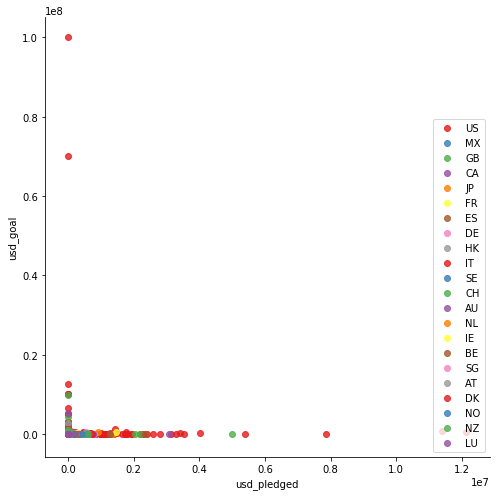

In [67]:
#correlation usd_pledged vs. usd_goal


# library & dataset
import seaborn as sns

#Size

 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="usd_pledged", y="usd_goal", 
           data=df_kickstarter, fit_reg=False, 
           hue='country', legend=False, palette="Set1", size=7, aspect=1)

 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()




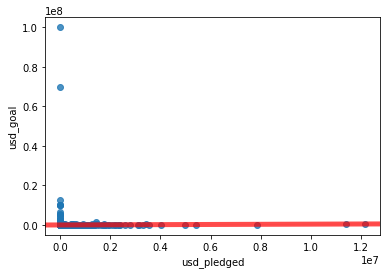

In [68]:
#Regression + trendline usd_pledged vs. usd_goal
sns.regplot(x=df_kickstarter["usd_pledged"], y=df_kickstarter["usd_goal"], line_kws={"color":"r","alpha":0.7,"lw":5})


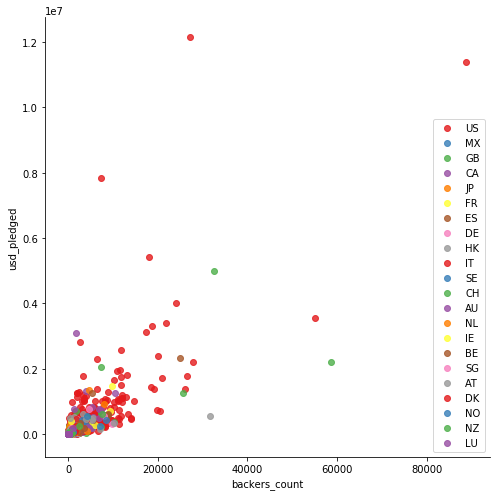

In [69]:
#showing usd_pledged vs. backers_count

# library & dataset
import seaborn as sns
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="backers_count", y="usd_pledged", 
           data=df_kickstarter, fit_reg=False, 
           hue='country', legend=False, palette="Set1", size=7, aspect=1)

 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()




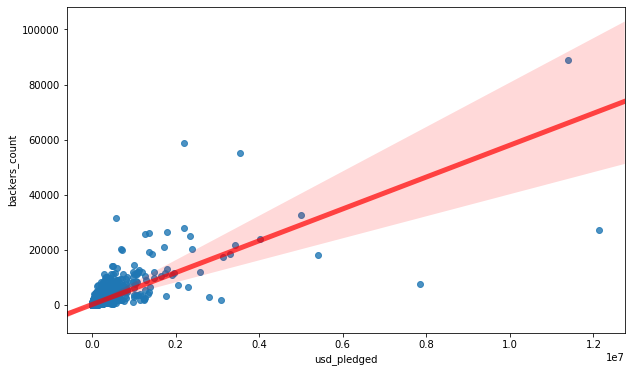

In [70]:
#Scatter plot + trendline usd_pledged vs. backers_count
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x=df_kickstarter["usd_pledged"], 
            y=df_kickstarter["backers_count"], 
            line_kws={"color":"r","alpha":0.7,"lw":5})


### Histograms

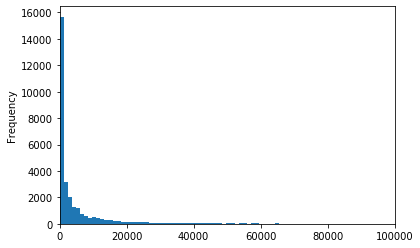

In [71]:
df_kickstarter['usd_pledged'].plot(kind="hist",
                 bins=10000,
                 xlim=(0,100000));

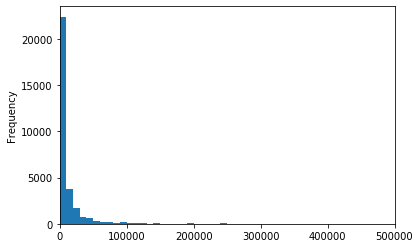

In [72]:
df_kickstarter['usd_goal'].plot(kind="hist",
                 bins=10000,
                 xlim=(0,500000));

## Export to *.csv

In [73]:
df_kickstarter.to_csv('kickstarter_output_TG.csv', sep=',', index=False)